***Primary Goal:***

To predict house prices based on various property features such as area, number of bedrooms, bathrooms, stories, etc

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("Housing.csv")

# Basic inspection
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Handle missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [9]:
df.dtypes


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

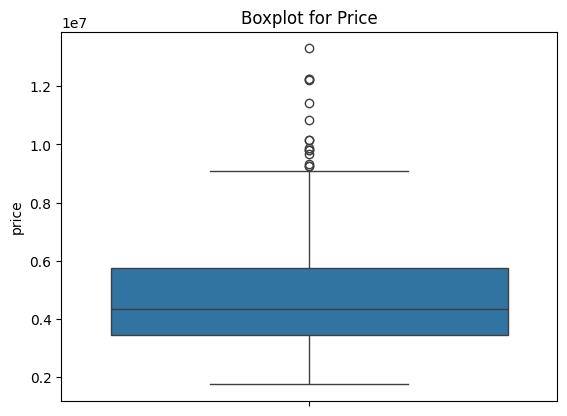

In [10]:
# To detect outliers if any:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['price'])
plt.title("Boxplot for Price")
plt.show()

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


***Some Basic Viz***

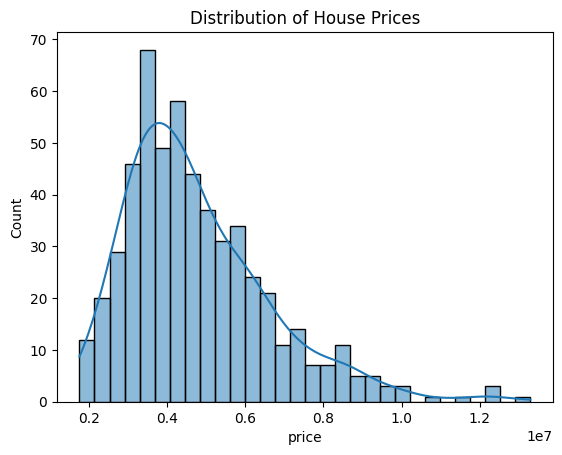

In [25]:
# Histogram for price distribution
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()


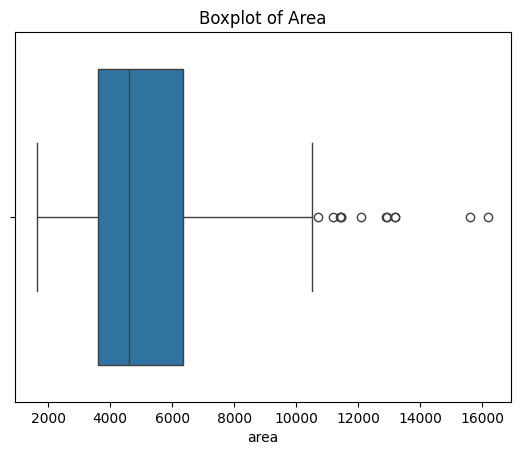

In [26]:
# Boxplot for area
sns.boxplot(x=df['area'])
plt.title("Boxplot of Area")
plt.show()


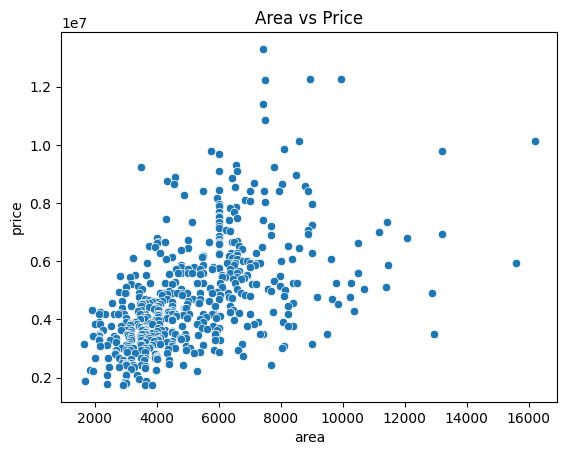

In [27]:
# Scatter plot for area vs price : Relationship between area and price
sns.scatterplot(x='area', y='price', data=df)
plt.title("Area vs Price")
plt.show()


#### Summary of Exploratory Phase

Dataset is clean and well-structured.

price will be the dependent variable.

Major independent variables: area, bedrooms, bathrooms, stories, etc.

No missing data.

Minor outliers in price and area handled using IQR.

Data types identified for encoding before regression modeling.

***Prepare Data for Modelling***

In [31]:
# Split Data: dependent (target) and independent (features) 
X = df.drop('price', axis=1)
y = df['price']

In [43]:
# categorical columns we have:

df.select_dtypes(include=['object', 'category']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [34]:
# convert categorical var into numerical form using Label Encoding.
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['mainroad', 'guestroom', 'basement', 
                    'hotwaterheating', 'airconditioning', 
                    'parking', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    le = LabelEncoder()        # Create new instance per column
    X[col] = le.fit_transform(X[col])



In [39]:
X[categorical_cols].head()


,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1,0,0,0,1,2,1,0
1,1,0,0,0,1,3,0,0
2,1,0,1,0,0,2,1,1
3,1,0,1,0,1,3,1,0
4,1,1,1,0,1,2,0,0


In [40]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [44]:
# Divide the data into 80% training and 20% testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
# Feature Scaling
# Scaling helps bring all numerical features to a similar range, improving regression performance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

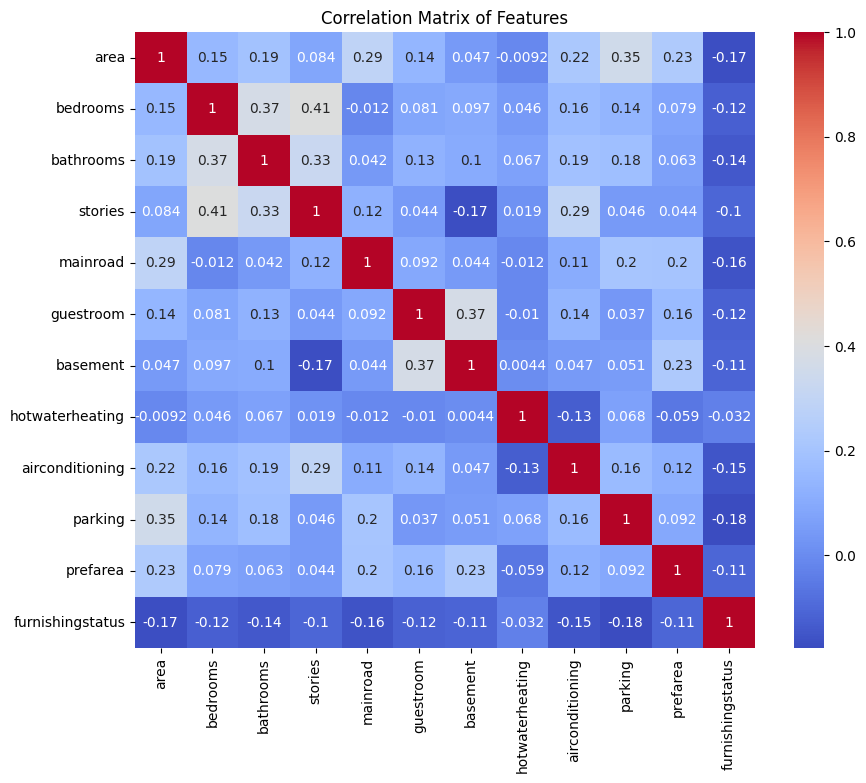

In [54]:
# Correlation Matrix

plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()
# Helps visualize if two or more independent variables are highly correlated (|r| > 0.8).


##### High positive correlations:

bedrooms and stories (0.41)

bathrooms and bedrooms (0.37)

guestroom and basement (0.37)

##### Moderate positive correlations:

parking and area (0.35)

stories and bathrooms (0.33)

***Model Comparison (Train and Evaluate)***

In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


In [61]:
# Simple Linear Regression

# Use only 'area' as predictor
X_train_area = X_train_scaled[:, [X.columns.get_loc('area')]]
X_test_area = X_test_scaled[:, [X.columns.get_loc('area')]]

lr_simple = LinearRegression()
lr_simple.fit(X_train_area, y_train)
y_pred_simple = lr_simple.predict(X_test_area)

# Calculate R²
r2_s = r2_score(y_test, y_pred_simple)

# Calculate Adjusted R²
n = len(y_test)
p = 1  # Number of predictors (only 'area')
adj_r2_s = 1 - (1 - r2_s) * (n - 1) / (n - p - 1)

# Calculate RMSE
rmse_s = np.sqrt(mean_squared_error(y_test, y_pred_simple))

# Calculate MAE
mae_s = mean_absolute_error(y_test, y_pred_simple)

print("Simple Linear Regression:")
print("R²:", r2_s, "Adj R²:", adj_r2_s, "RMSE:", rmse_s, "MAE:", mae_s)


Simple Linear Regression:
R²: 0.27287851871974633 Adj R²: 0.266082990857314 RMSE: 1917103.7021424235 MAE: 1474748.1337969352


In [62]:
# Multiple Linear Regression

# Fit the model with all scaled features
lr_multi = LinearRegression()
lr_multi.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_multi = lr_multi.predict(X_test_scaled)

# Calculate R²
r2_m = r2_score(y_test, y_pred_multi)

# Calculate Adjusted R²
n = len(y_test)
p = X_train_scaled.shape[1]  # Number of predictors
adj_r2_m = 1 - (1 - r2_m) * (n - 1) / (n - p - 1)

# Calculate RMSE
rmse_m = np.sqrt(mean_squared_error(y_test, y_pred_multi))

# Calculate MAE
mae_m = mean_absolute_error(y_test, y_pred_multi)

print("Multiple Linear Regression:")
print("R²:", r2_m, "Adj R²:", adj_r2_m, "RMSE:", rmse_m, "MAE:", mae_m)


Multiple Linear Regression:
R²: 0.6494754192267793 Adj R²: 0.6056598466301268 RMSE: 1331071.4167895126 MAE: 979679.6912959907


In [63]:
# Ridge Regression

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_ridge = ridge.predict(X_test_scaled)

# Calculate R²
r2_r = r2_score(y_test, y_pred_ridge)

# Calculate Adjusted R²
n = len(y_test)
p = X_train_scaled.shape[1]  # Number of predictors
adj_r2_r = 1 - (1 - r2_r) * (n - 1) / (n - p - 1)

# Calculate RMSE
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Calculate MAE
mae_r = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression:")
print("R²:", r2_r, "Adj R²:", adj_r2_r, "RMSE:", rmse_r, "MAE:", mae_r)


Ridge Regression:
R²: 0.6493602620702652 Adj R²: 0.6055302948290484 RMSE: 1331290.0459820963 MAE: 979549.0281031149


In [64]:
# Lasso Regression


# Train Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lasso = lasso.predict(X_test_scaled)

# Calculate R²
r2_l = r2_score(y_test, y_pred_lasso)

# Calculate Adjusted R²
n = len(y_test)
p = X_train_scaled.shape[1]  # Number of predictors
adj_r2_l = 1 - (1 - r2_l) * (n - 1) / (n - p - 1)

# Calculate RMSE
rmse_l = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Calculate MAE
mae_l = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression:")
print("R²:", r2_l, "Adj R²:", adj_r2_l, "RMSE:", rmse_l, "MAE:", mae_l)


Lasso Regression:
R²: 0.6494753835469955 Adj R²: 0.60565980649037 RMSE: 1331071.4845341754 MAE: 979679.7241438974


[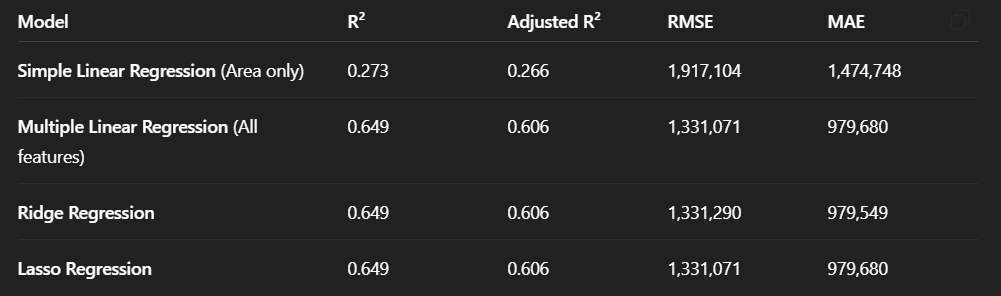](https://example.com/fullsize.png)

### The model with highest Adjusted R² and lowest RMSE/MAE is considered best performing.

WHich means only Simple Linear Regression performed poorly.

Using all features is necessary to predict housing prices accurately. so Multiple Linear Regression and Ridge Regression are the best models for this dataset.

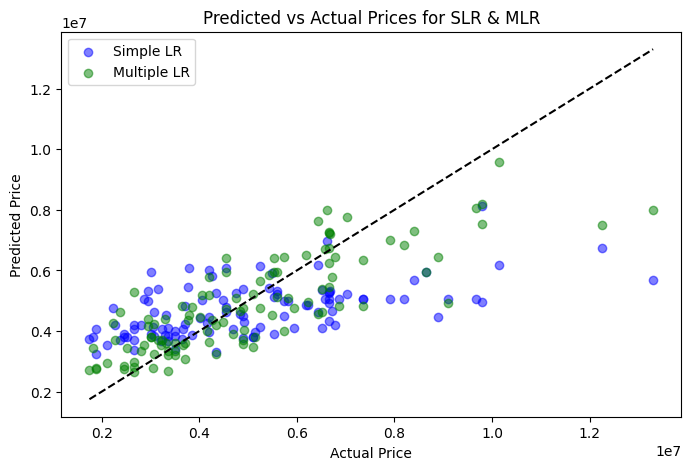

In [85]:

plt.figure(figsize=(8,5))

# Simple Linear Regression
plt.scatter(y_test, y_pred_simple, color='blue', alpha=0.5, label='Simple LR')

# Multiple Linear Regression
plt.scatter(y_test, y_pred_multi, color='green', alpha=0.5, label='Multiple LR')


# Plot reference line (Perfect Prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices for SLR & MLR")
plt.legend()
plt.show()

***Closer the points are to the diagonal line → better predictions.***

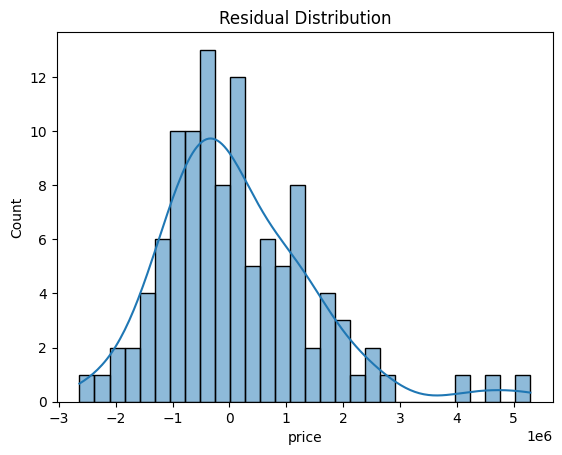

In [84]:
# Residuals : multiple linear regression
residuals = y_test - y_pred_multi

# Histogram of residuals
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()


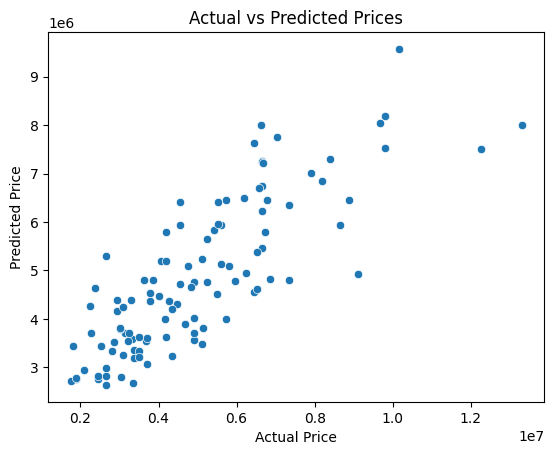

In [87]:
# Mutiple linear regression
# Scatterplot: Predicted vs Actual
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

Model fits reasonably well.

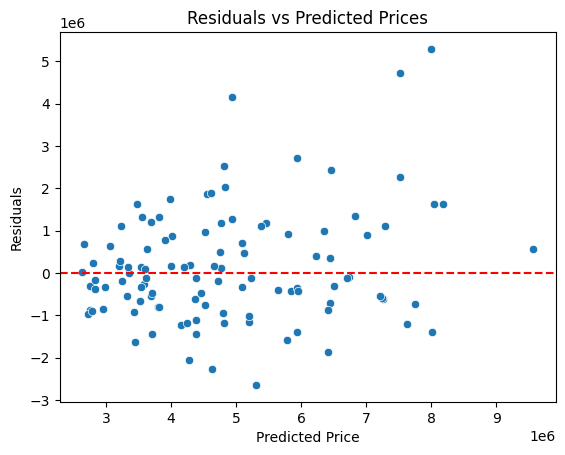

In [89]:
# Residuals vs Predicted Prices
sns.scatterplot(x=y_pred_multi, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()


The residuals are randomly scattered around the zero line, showing no clear pattern.
This indicates that the model’s assumptions of linearity and constant variance (homoscedasticity) are reasonably satisfied.
Most predictions are close to the actual values, and only a few outliers exist.

***Limitations:***

Limited data size may affect model accuracy.

Some important variables might be missing.

***Next Steps could be:***

Collect more diverse data.

Apply feature engineering to improve prediction power.

Try advanced models